In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [159]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [160]:
init_notebook_mode(connected=True)
cf.go_offline()

In [161]:
df=pd.read_csv('METHANOL.csv')

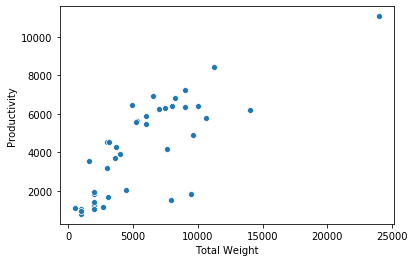

In [162]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [163]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,34.000000
mean,307.829268,194546.463415,20.954878,41.098293,5704.158610,0.057561,0.005756,0.0,0.325122,4.935854,4172.724634,25049.740588
std,155.590954,4074.630941,23.334274,109.038012,4491.684216,0.044765,0.004476,0.0,1.156633,12.440309,2526.278101,10850.220479
min,13.000000,191063.000000,0.000000,0.000000,500.000000,0.010000,0.001000,0.0,0.000000,0.000000,806.720000,5635.390000
25%,182.000000,191669.000000,0.000000,0.000000,2000.000000,0.020000,0.002000,0.0,0.000000,0.000000,1694.760000,18857.880000
50%,377.000000,192174.000000,22.470000,24.530000,4900.000000,0.050000,0.005000,0.0,0.000000,0.000000,4297.360000,19324.000000
75%,414.000000,200139.000000,29.750000,44.320000,8000.000000,0.080000,0.008000,0.0,0.000000,0.530000,6280.370000,30511.000000
max,492.000000,200849.000000,122.230000,704.500000,24000.000000,0.240000,0.024000,0.0,6.450000,59.000000,11076.920000,47343.000000


In [164]:
df=df[df['Productivity']<8000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,32.000000
mean,301.538462,194485.333333,19.875641,40.922564,5092.702949,0.051538,0.005154,0.0,0.341795,5.119744,3886.242821,24666.630625
std,156.885618,4038.253748,23.310441,111.850032,3351.657922,0.033524,0.003352,0.0,1.184214,12.731820,2213.556440,10660.960135
min,13.000000,191063.000000,0.000000,0.000000,500.000000,0.010000,0.001000,0.0,0.000000,0.000000,806.720000,5635.390000
25%,181.500000,191720.500000,0.000000,0.000000,2000.000000,0.020000,0.002000,0.0,0.000000,0.000000,1622.030000,18821.840000
50%,376.000000,192174.000000,20.500000,24.250000,4422.583000,0.040000,0.004000,0.0,0.000000,0.000000,4154.900000,19324.000000
75%,413.000000,200139.000000,28.740000,39.660000,7745.338000,0.080000,0.008000,0.0,0.000000,0.500000,6051.300000,30297.000000
max,492.000000,200849.000000,122.230000,704.500000,14000.000000,0.140000,0.014000,0.0,6.450000,59.000000,7260.500000,47343.000000


In [165]:
df=df[df['Total Weight']<12000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,31.000000
mean,297.210526,194336.552632,18.973684,40.534474,4858.300395,0.049211,0.004921,0.0,0.350789,5.254474,3825.223158,24839.457419
std,156.614375,3982.663931,22.923296,113.324828,3055.563723,0.030614,0.003061,0.0,1.198759,12.874518,2209.778897,10791.521445
min,13.000000,191063.000000,0.000000,0.000000,500.000000,0.010000,0.001000,0.0,0.000000,0.000000,806.720000,5635.390000
25%,181.250000,191694.750000,0.000000,0.000000,2000.000000,0.020000,0.002000,0.0,0.000000,0.000000,1585.665000,18821.840000
50%,364.500000,192130.000000,19.315000,22.935000,4211.291500,0.040000,0.004000,0.0,0.000000,0.000000,4027.350000,19339.000000
75%,411.750000,200131.750000,28.122500,34.562500,7575.000000,0.080000,0.008000,0.0,0.000000,0.515000,5873.090000,30404.000000
max,492.000000,200849.000000,122.230000,704.500000,10668.715000,0.110000,0.011000,0.0,6.450000,59.000000,7260.500000,47343.000000


In [166]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [167]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
print(lm.intercept_)

1672.7303333304517


In [169]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.429175


In [170]:
predictions = lm.predict(X_test)

In [171]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 1295.7635913219553
MSE: 2038064.657488412
RMSE: 1427.6080195517297
r2_score: 0.6104702157228566


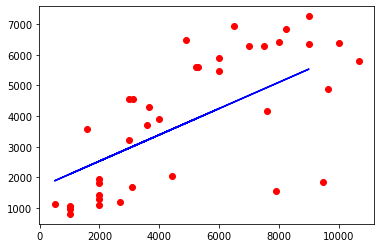

In [172]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [173]:
joblib.dump(lm,"Methanol.pkl")#only execute if rmse is less than half of mean of productivity

['Methanol.pkl']